# **Used Car Retail Price Recommendation**
----
**Final Capstone Project - Dibimbing Machine Learning Batch 3**

**by Reinhard Jonathan Silalahi**

### **Requirement installation**

In [1]:
# !pip install -r requirements.txt

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import pandas as pd

### **Connect to PostgreSQL Database and Load Data**

In [3]:
# Define the database connection parameters
username = 'postgres'
password = 'password'
host = 'localhost'
port = '5432'  # Default PostgreSQL port
database = 'db_scrapper'

# Create the database connection
engine = create_engine(f'postgresql://{username}:{password}@{host}:{port}/{database}')

# Query to get the data
query = '''
select 
	scrapper.id,
	brand.name as brand, 
	model.name as model, 
	type.name as type, 
	color.name as color,
	year, 
	mileage, 
	transmission, 
	engine_capacity, 
	condition,
    price,
	province, 
	region,
    scrapper.data_source
from scrapper
join brand on scrapper.brand_id = brand.id
join model on scrapper.model_id = model.id
join type on scrapper.type_id = type.id
join color on scrapper.color_id = color.id
'''

# Load data into a DataFrame
df = pd.read_sql(query, engine)

# Close the connection (if necessary)
engine.dispose()

In [4]:
# Display basic information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886824 entries, 0 to 886823
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               886824 non-null  object 
 1   brand            886824 non-null  object 
 2   model            886824 non-null  object 
 3   type             886824 non-null  object 
 4   color            886824 non-null  object 
 5   year             886824 non-null  int64  
 6   mileage          886824 non-null  int64  
 7   transmission     886824 non-null  object 
 8   engine_capacity  886824 non-null  int64  
 9   condition        886824 non-null  object 
 10  price            886824 non-null  float64
 11  province         886709 non-null  object 
 12  region           886824 non-null  object 
 13  data_source      886824 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 94.7+ MB
None


In [5]:
# Display the first few rows
print(df.head())

                                     id  brand model              type  \
0  fd95c676-260e-4ff7-8f57-63684c83d93f  Honda  CR-V               2.0   
1  448bd495-19df-4155-90ee-cbcd8e7e7389  Honda  CR-V      2.4 PRESTIGE   
2  5713bac9-ae4c-4ddc-9b4e-72eac5e6c33c  Honda  CR-V           2.0 RM1   
3  cc8bc50a-2f47-4dd7-beac-9b828094a17e  Honda  City  1.5 HATCHBACK RS   
4  6655d3b1-931a-4851-8081-63b578ffbefd  Honda  City  1.5 HATCHBACK RS   

    color  year  mileage transmission  engine_capacity condition        price  \
0  Silver  2001   301000    AUTOMATIC                0  USED_CAR   76000000.0   
1  Silver  2016    90000    AUTOMATIC                0  USED_CAR  269000000.0   
2  Silver  2009   120000       MANUAL                0  USED_CAR  123000000.0   
3   Putih  2022    20000    AUTOMATIC                0  USED_CAR  262000000.0   
4   Putih  2021    20000    AUTOMATIC                0  USED_CAR  260000000.0   

         province     region data_source  
0      Jawa Barat  Indone

In [6]:
# Display summary statistics
print(df.describe())

                year       mileage  engine_capacity         price
count  886824.000000  8.868240e+05    886824.000000  8.868240e+05
mean     2014.798618  8.005504e+04        13.592801  2.594906e+08
std         6.186048  5.603058e+04       170.667507  4.291223e+08
min      1970.000000  0.000000e+00         0.000000  1.000000e+00
25%      2012.000000  4.000000e+04         0.000000  1.150000e+08
50%      2016.000000  7.000000e+04         0.000000  1.690000e+08
75%      2019.000000  1.100000e+05         0.000000  2.650000e+08
max      2024.000000  2.095000e+06      7545.000000  8.500000e+10


### **Data sources**

In [7]:
unique_values = df['data_source'].unique()
print(f"Data sources: {unique_values}")

Data sources: ['OLX' 'CARMUDI']


### **Remove Duplicates**

In [8]:
print("Count before removing duplicate rows: ", df.shape)
beforeDuplicatesDrop = df.duplicated(subset=[col for col in df.columns if col != 'id']).sum()

print("Total duplicate rows: ", beforeDuplicatesDrop)

df = df.drop_duplicates(subset=[col for col in df.columns if col != 'id'])
print("Count after removing duplicate rows: ", df.shape)

Count before removing duplicate rows:  (886824, 14)
Total duplicate rows:  167076
Count after removing duplicate rows:  (719748, 14)


In [9]:
df.isna().sum()

id                   0
brand                0
model                0
type                 0
color                0
year                 0
mileage              0
transmission         0
engine_capacity      0
condition            0
price                0
province           115
region               0
data_source          0
dtype: int64

### **Temporarily do not handle missing value for province column, do it later after data train & test splitting**

In [10]:
# Get boolean DataFrame indicating NaN
na_locations = df.isna()

# Identify rows where any NaN value exists
rows_with_na = na_locations.any(axis=1)

# Filter DataFrame to get rows with NaN values
df_with_na = df[rows_with_na]

# Print the rows with NaN values
print("Rows with NaN values:")
print(df_with_na)

Rows with NaN values:
                                          id          brand            model  \
1380    895f8d20-f731-4ba0-a795-43142b104ae4       Daihatsu            Xenia   
2588    7bc966d0-b4c0-4c6f-b629-3de047d7602f         Toyota             Agya   
3921    e486d775-830d-489c-8b72-6a4ea2bf5c68         Toyota            Yaris   
10254   3ca9620e-645a-4bf2-962f-86f477167563           Ford           Fiesta   
10322   f7824a71-af40-421e-a570-743e21ec315e     Mitsubishi  Outlander Sport   
...                                      ...            ...              ...   
873815  5e3fba43-79a6-44c6-8701-cf8702b22f3f  Mercedes-Benz             A200   
874786  95f6bf15-bb65-4931-87ea-77e26189fb6f          Honda             HR-V   
876908  dc1f9f61-f0c8-4c02-873c-2634770f7449     Mitsubishi           Lancer   
877177  c3c4e054-bb5c-4e4a-9f76-f3810a014b38          Honda          Mobilio   
881868  5cb7643a-d221-42b4-8509-554a02528dfb       Daihatsu         Gran max   

                 

### **Handling Missing and Wrong Value**

In [11]:
contains_zero = (df['engine_capacity'] == 0).any()

print(contains_zero)

if contains_zero:
    print("The 'engine_capacity' column contains zero values.")
    
    # Calculate the number of zero values
    zero_count = (df['engine_capacity'] == 0).sum()
    
    print(f"Number of zero values in 'engine_capacity': {zero_count}")
    
    # Calculate the percentage of zero values
    zero_percentage = (zero_count / len(df)) * 100
    
    print(f"Percentage of zero values: {zero_percentage:.2f}%")
else:
    print("The 'engine_capacity' column does not contain any zero values.")

True
The 'engine_capacity' column contains zero values.
Number of zero values in 'engine_capacity': 713817
Percentage of zero values: 99.18%


**Because zero missing value on 'engine_capacity' percentage is more than 20%, then drop it**

In [12]:
if 'engine_capacity' in df.columns:
    df = df.drop(columns=['engine_capacity'])
    print(f"Column '{'engine_capacity'}' has been dropped.")

Column 'engine_capacity' has been dropped.


### **Fix wrong condition type, based on the mileage**

In [13]:
count = ((df['mileage'] != 0) & (df['condition'] == 'NEW_CAR')).sum()

print(f"Number of rows where mileage != 0 and condition is NEW_CAR: {count}")

Number of rows where mileage != 0 and condition is NEW_CAR: 484


In [14]:
# Update car_type to 'USED_CAR' for non-zero mileage
df.loc[df['mileage'] > 0, 'condition'] = 'USED_CAR'

In [15]:
count = ((df['mileage'] == 0) & (df['condition'] == 'USED_CAR')).sum()

print(f"Number of rows where mileage == 0 and condition is USED_CAR: {count}")

Number of rows where mileage == 0 and condition is USED_CAR: 74


In [16]:
# Update car_type to 'NEW_CAR' for zero mileage
df.loc[df['mileage'] == 0, 'condition'] = 'NEW_CAR'

In [17]:
count = ((df['mileage'] != 0) & (df['condition'] == 'NEW_CAR')).sum()
print(f"Number of rows where mileage != 0 and condition is NEW_CAR: {count}")

count = ((df['mileage'] == 0) & (df['condition'] == 'USED_CAR')).sum()
print(f"Number of rows where mileage == 0 and condition is USED_CAR: {count}")

Number of rows where mileage != 0 and condition is NEW_CAR: 0
Number of rows where mileage == 0 and condition is USED_CAR: 0


### **Split Train & Test**

In [18]:
from sklearn.model_selection import train_test_split
train_car, test_car = train_test_split(df, test_size = 0.2, random_state=42)

In [19]:
# untuk plot Q-Q
import scipy.stats as stats

def check_plot(df, variable):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

### **Handle the previous missing value**

In [20]:
train_car[train_car['province'].isna()].head()

,id,brand,model,type,color,year,mileage,transmission,condition,price,province,region,data_source
183875,fff9155b-e87e-4804-9fe1-d6df659fac1f,Daihatsu,Ayla,1.2 X,Abu-abu,2019,55000,MANUAL,USED_CAR,110000000.0,None,Indonesia,OLX
189513,0f1edfb6-13db-4c78-a74b-6e45b23325f0,Honda,Mobilio,1.5 E,Abu-abu,2014,10000,AUTOMATIC,USED_CAR,140000000.0,None,Indonesia,OLX
53396,01afd636-90bf-488b-994e-c2753d99af48,Toyota,Fortuner,2.7 TRD G LUXURY,Silver,2006,235000,AUTOMATIC,USED_CAR,150000000.0,None,Indonesia,OLX
119431,e0562def-b9f9-4ee3-a2a5-2ba422155844,Toyota,Rush,1.5 G,Hitam,2013,95000,MANUAL,USED_CAR,128000000.0,None,Indonesia,OLX
75857,1995c61a-e325-481a-8497-b5ceac6e71cb,Peugeot,206,1.4 XS,Merah,2004,140000,AUTOMATIC,USED_CAR,61250000.0,None,Indonesia,OLX


In [21]:
train_mode_province = train_car[~train_car['province'].isna()]['province'].mode()[0]
train_mode_province # this is the modus or the most frequency province

'Jakarta D.K.I.'

In [22]:
# Apply the missing value province, with the modus province
train_car['province'] = train_car['province'].apply(lambda x: train_mode_province if pd.isna(x) else x)

In [23]:
# Expected that no more missing value of province
train_car[train_car['province'].isna()].head()

,id,brand,model,type,color,year,mileage,transmission,condition,price,province,region,data_source


### **Handling Outliers**

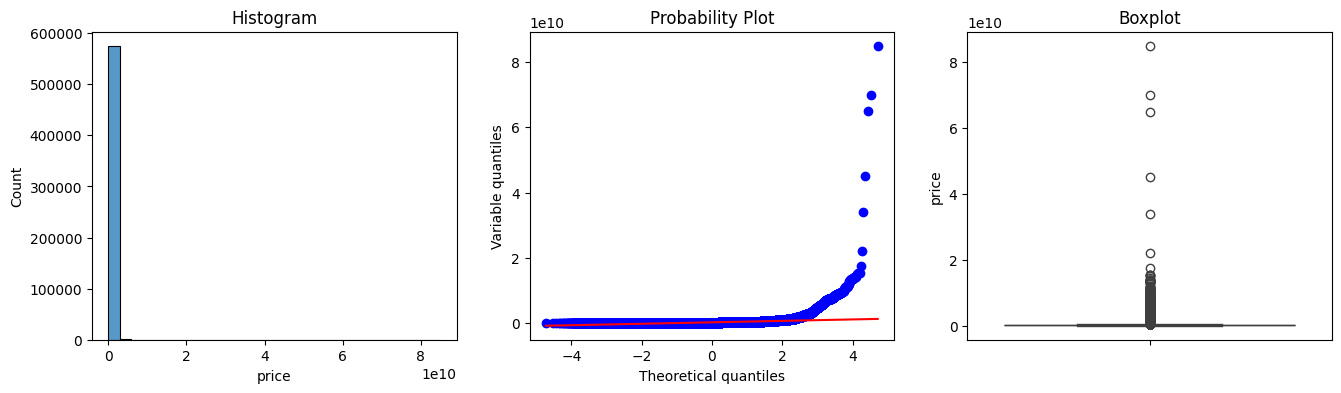

In [24]:
check_plot(train_car, 'price')

In [25]:
# Find the index of the row with the maximum price
max_price_index = train_car['price'].idxmax()

# Select the row with the maximum price
row_with_max_price = train_car.loc[max_price_index]

print(row_with_max_price)

id              d8566590-fa87-4912-9a40-e5424f11ef7d
brand                                       Daihatsu
model                                          Xenia
type                                    1.3 R DELUXE
color                                        Abu-abu
year                                            2009
mileage                                       120000
transmission                                  MANUAL
condition                                   USED_CAR
price                                  85000000000.0
province                                        Riau
region                                     Indonesia
data_source                                      OLX
Name: 273855, dtype: object


In [26]:
# Find the index of the row with the maximum price
max_price_index = test_car['price'].idxmax()

# Select the row with the maximum price
row_with_max_price = test_car.loc[max_price_index]

print(row_with_max_price)

id              350c574b-d522-4933-9c24-f7beeb7fb89d
brand                                  Mercedes-Benz
model                                         AMG GT
type                                           4.0 S
color                                        Lainnya
year                                            2022
mileage                                         5000
transmission                               AUTOMATIC
condition                                   USED_CAR
price                                  19000000000.0
province                              Jakarta D.K.I.
region                                     Indonesia
data_source                                      OLX
Name: 823721, dtype: object


In [27]:
# Function to identify and handle outliers based on IQR
def handle_outliers_iqr(group):
    Q1 = group['price'].quantile(0.25)
    Q3 = group['price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Convert outliers to the nearest bound
    group['price'] = group['price'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    
    return group

# Apply the outlier handling function to each group
train_car = train_car.groupby(['brand', 'model', 'type']).apply(handle_outliers_iqr).reset_index(drop=True)

print("DataFrame with outliers handled:")
print(train_car)

/tmp/ipykernel_151164/3362087896.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_car = train_car.groupby(['brand', 'model', 'type']).apply(handle_outliers_iqr).reset_index(drop=True)


DataFrame with outliers handled:
                                          id   brand  model  \
0       08b61c87-6b06-48d2-b90b-ca128484684c    Audi     A3   
1       20e02bbd-6cc5-4a17-b074-8f504a3795bd    Audi     A3   
2       5736e346-311b-4f4b-a0c7-842c11533879    Audi     A3   
3       17603f16-fbff-41d4-b61b-285633dcd2de    Audi     A3   
4       4e743784-3a9f-4fe1-827c-99f3e52f4172    Audi     A3   
...                                      ...     ...    ...   
575793  8bc7943a-dd20-4bc4-9270-e6571aafb96d  Wuling  Formo   
575794  77556f54-0c63-4927-bc1e-0792eafc3b68  Wuling  Formo   
575795  4186ebec-9fff-44d9-b7ac-875acb4b1f0e  Wuling  Formo   
575796  aa74d109-a0a8-4f9d-a595-3bcf6ac85f46  Wuling  Formo   
575797  985b55d1-8027-4ebe-9fb2-087c1aea0b1c  Wuling  Formo   

                       type    color  year  mileage transmission condition  \
0        1.2 SPORTBACK TFSI   Kuning  2017    65000    AUTOMATIC  USED_CAR   
1        1.2 SPORTBACK TFSI    Hitam  2004   110000   

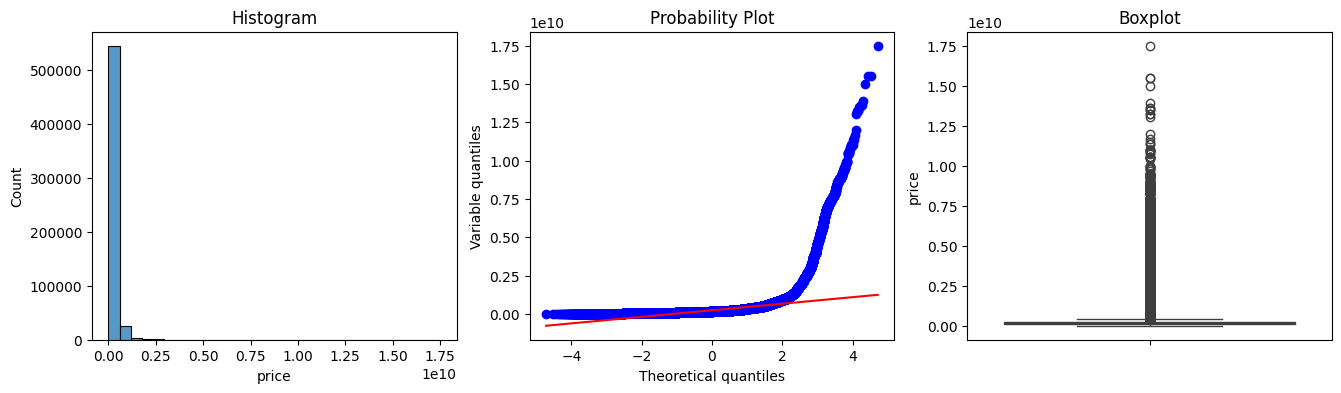

In [28]:
check_plot(train_car, 'price')

In [29]:
# Find the index of the row with the maximum price
max_price_index = train_car['price'].idxmax()

# Select the row with the maximum price
row_with_max_price = train_car.loc[max_price_index]

print(row_with_max_price)

id              58d44778-9ff5-4f0c-9d0c-df508691331f
brand                                    Lamborghini
model                                      Lain-lain
type                                       LAIN-LAIN
color                                        Abu-abu
year                                            2022
mileage                                         5000
transmission                               AUTOMATIC
condition                                   USED_CAR
price                                  17500000000.0
province                              Jakarta D.K.I.
region                                     Indonesia
data_source                                      OLX
Name: 234275, dtype: object


### Check whether the train data outlier is handled correctly

Checking for specific group, for example 'Mercedes Benz, AMG GT, 4.0S'

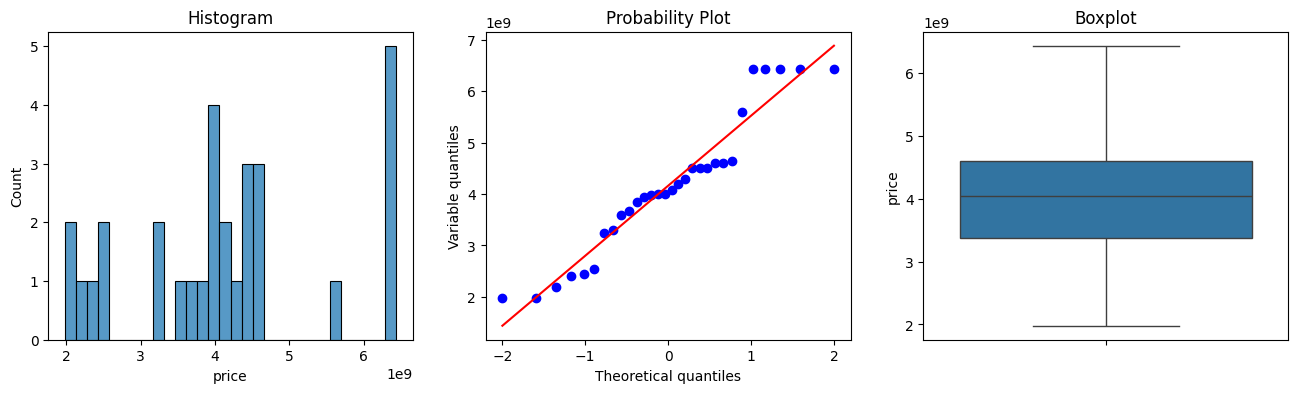

In [30]:
# Filter the DataFrame
filtered_df = train_car[
    (train_car['brand'] == 'Mercedes-Benz') &
    (train_car['model'] == 'AMG GT') &
    (train_car['type'] == '4.0 S')
]

num_of_rows = filtered_df.shape[0]
num_of_rows

check_plot(filtered_df, 'price')

### **Handle test data outlier**

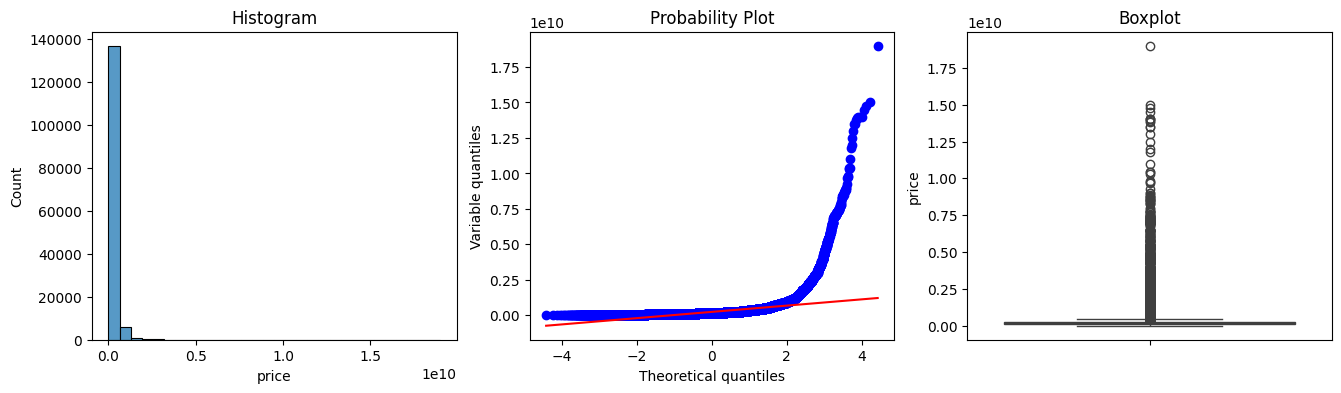

In [31]:
check_plot(test_car, 'price')

In [32]:
# Apply the outlier handling function to each group
test_car = test_car.groupby(['brand', 'model', 'type']).apply(handle_outliers_iqr).reset_index(drop=True)

print("DataFrame with outliers handled:")
print(test_car)

DataFrame with outliers handled:
                                          id   brand  model  \
0       a01969a8-6cd8-4cb4-a572-e51467d32fe4    Audi     A3   
1       d6a13024-e7d0-44ec-8dc6-dcbcaed0282f    Audi     A3   
2       fdd6fe70-0f84-4e91-85b8-790ac9e5e0e2    Audi     A3   
3       d046342c-2837-4478-adeb-0468b4e97ea7    Audi     A3   
4       e987f72c-6b29-4d41-b061-6b479f930209    Audi     A3   
...                                      ...     ...    ...   
143945  c6154564-5ffe-4939-9a72-a14ac810584e  Wuling  Formo   
143946  b6e38c76-543e-4b63-b983-805311ca96de  Wuling  Formo   
143947  e36422d1-946f-4f60-aff2-51205d17a4be  Wuling  Formo   
143948  83e26df2-4299-4e83-ab50-29f3d842efcb  Wuling  Formo   
143949  6e06c02c-7428-4b41-bd15-91a2165a8370  Wuling  Formo   

                       type    color  year  mileage transmission condition  \
0        1.2 SPORTBACK TFSI    Merah  2017    20000    AUTOMATIC  USED_CAR   
1                       1.4    Merah  2016    15000   

/tmp/ipykernel_151164/493655800.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_car = test_car.groupby(['brand', 'model', 'type']).apply(handle_outliers_iqr).reset_index(drop=True)


In [33]:
# Find the index of the row with the maximum price
max_price_index = test_car['price'].idxmax()

# Select the row with the maximum price
row_with_max_price = test_car.loc[max_price_index]

print(row_with_max_price)

id              ba444b3b-110e-43fd-bdeb-537c335b4e64
brand                                        Porsche
model                                            911
type                                        CARERA S
color                                         Silver
year                                            2018
mileage                                         5000
transmission                               AUTOMATIC
condition                                   USED_CAR
price                                  15000000000.0
province                              Jakarta D.K.I.
region                                     Indonesia
data_source                                      OLX
Name: 89807, dtype: object


**The max price for test price is now changed, previously max price is 'Mercedes Benz, AMG GT, 4.0S' with price 19.000.000.000**

**Now the max price is the 'Porsche 911 Carera S' which more make sense for sport car**

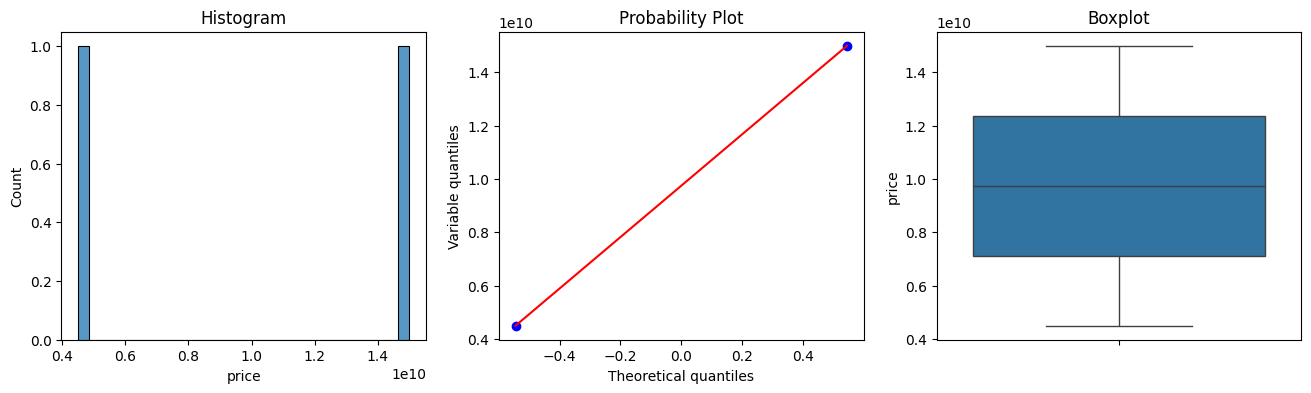

In [34]:
# Filter the DataFrame
filtered_df = test_car[
    (test_car['brand'] == 'Porsche') &
    (test_car['model'] == '911') &
    (test_car['type'] == 'CARERA S')
]

num_of_rows = filtered_df.shape[0]
num_of_rows

check_plot(filtered_df, 'price')

### **Encoding**

In [35]:
train_car['brand'].unique()

array(['Audi', 'BMW', 'Bentley', 'Cadillac', 'Chery', 'Chevrolet',
       'Chrysler', 'Daihatsu', 'Datsun', 'Dodge', 'Fiat', 'Ford', 'Honda',
       'Hummer', 'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land Rover', 'Lexus', 'Maserati', 'Mazda',
       'Mercedes-Benz', 'Mini Cooper', 'Mitsubishi', 'Nissan', 'Opel',
       'Peugeot', 'Porsche', 'Proton', 'Renault', 'Smart', 'Subaru',
       'Suzuki', 'Toyota', 'Volkswagen', 'Volvo', 'Wuling'], dtype=object)

In [36]:
import datetime
import numpy as np
from sklearn.preprocessing import LabelEncoder

class CustomLabelEncoder:
    def __init__(self):
        self.classes_ = None

    def fit(self, y):
        self.classes_ = np.unique(y)
        return self

    def transform(self, y):
        return np.array([self._map_value(val) for val in y])

    def _map_value(self, val):
        if val in self.classes_:
            return np.where(self.classes_ == val)[0][0]
        else:
            return len(self.classes_)

    def fit_transform(self, y):
        self.fit(y)
        return self.transform(y)


# Calculate age from the year
train_car['age'] = datetime.datetime.now().year - train_car['year']
test_car['age'] = datetime.datetime.now().year - test_car['year']

# le = LabelEncoder()

# Backup the original name value of categorical columns
# Convert categorical columns to numeric using Label Encoding
categorical_columns = ['brand', 'model', 'type', 'color', 'transmission', 'condition', 'province', 'region']
for column in categorical_columns:
    train_car[column + '_name'] = train_car[column]
    test_car[column + '_name'] = test_car[column]

    le = CustomLabelEncoder()
    train_car[column] = le.fit_transform(train_car[column])  # Convert to string to handle any non-numeric values
    test_car[column] = le.transform(test_car[column])  # Convert to string to handle any non-numeric values

# for 800k rows, the label encoding here, typically takes 1m 52s to be done

### **Feature Selection**

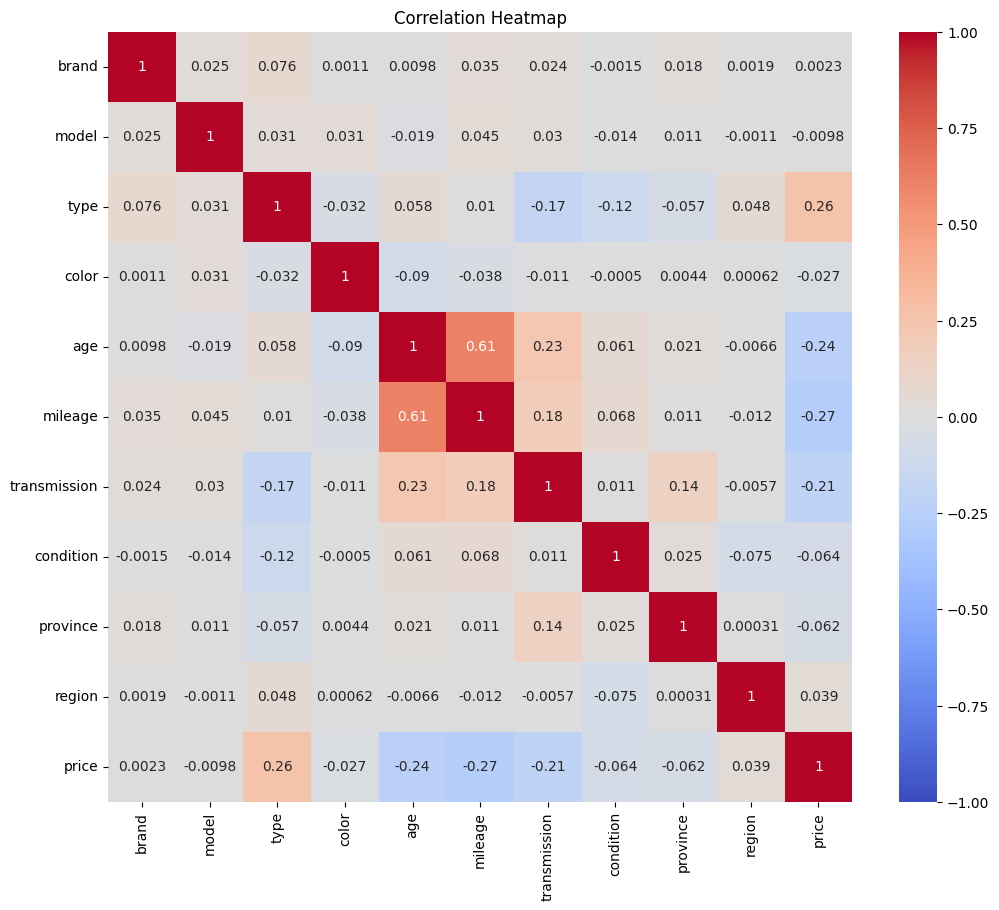

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Compute correlation matrix
correlation_matrix = train_car[['brand', 'model', 'type', 'color', 'age', 'mileage', 'transmission', 'condition', 'province', 'region', 'price']].corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

### **no need for feature selection**